In [31]:
import pymysql
connection=pymysql.connect(host='localhost',
                user='root',
                password='9805',
                database='crime_data'
       )
connection

In [32]:
import warnings 
warnings.filterwarnings("ignore")

In [45]:
import pandas as pd
query="select * from crime_data limit 5"
data=pd.read_sql(query,connection)
data

,DR_NO,Date_Rptd,DATE_OCC,AREA_NAME,Crm_Cd,Crm_Cd_Desc,Vict_Age,Vict_Sex,Premis_Desc,Status,Location,LAT,LON
0,10304468,01-08-2020,01-08-2020,Southwest,624,BATTERY - SIMPLE ASSAULT,36,F,SINGLE FAMILY DWELLING,AO,1100 W 39TH PL,34.01,-118.30
1,190101086,01-02-2020,01-01-2020,Central,624,BATTERY - SIMPLE ASSAULT,25,M,SIDEWALK,IC,700 S HILL ST,34.05,-118.25
2,191501505,01-01-2020,01-01-2020,N Hollywood,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),76,F,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",IC,5400 CORTEEN PL,34.17,-118.40
3,191921269,01-01-2020,01-01-2020,Mission,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",31,X,BEAUTY SUPPLY STORE,IC,14400 TITUS ST,34.22,-118.45
4,200100502,01-02-2020,01-02-2020,Central,442,SHOPLIFTING - PETTY THEFT ($950 & UNDER),23,M,DEPARTMENT STORE,IC,700 S FIGUEROA ST,34.05,-118.26


In [46]:
query="select distinct(Crm_cd),Crm_cd_desc from crime_data"
df=pd.read_sql(query,connection)
df

,Crm_cd,Crm_cd_desc
0,624,BATTERY - SIMPLE ASSAULT
1,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER)
2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA..."
3,442,SHOPLIFTING - PETTY THEFT ($950 & UNDER)
4,946,OTHER MISCELLANEOUS CRIME
5,341,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI..."
6,330,BURGLARY FROM VEHICLE
7,930,CRIMINAL THREATS - NO WEAPON DISPLAYED
8,648,ARSON
9,354,THEFT OF IDENTITY


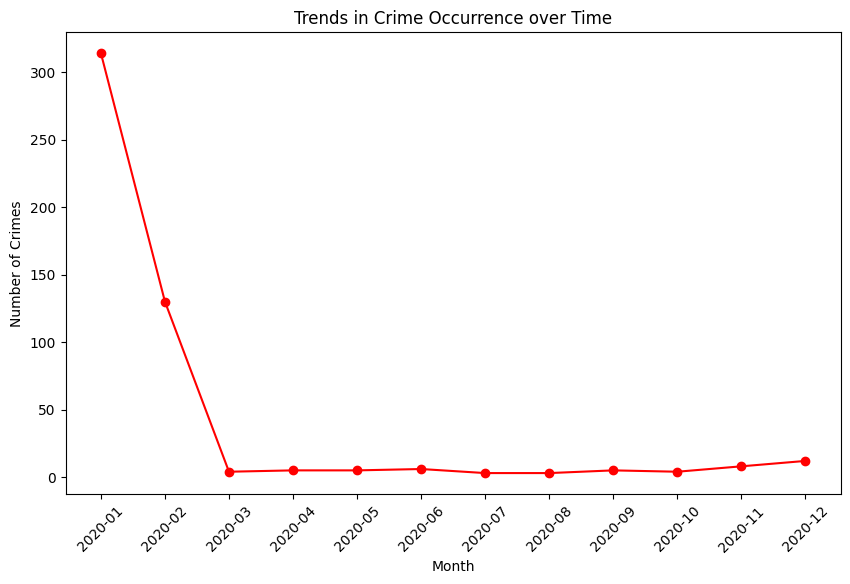

   crm_month  count
0    2020-01    314
1    2020-02    130
2    2020-03      4
3    2020-04      5
4    2020-05      5
5    2020-06      6
6    2020-07      3
7    2020-08      3
8    2020-09      5
9    2020-10      4
10   2020-11      8
11   2020-12     12


In [47]:
import matplotlib.pyplot as plt
query = """
select date_format(str_to_date(date_occ, '%m-%d-%Y'), '%Y-%m') as crm_month,
       COUNT(*) as count
from crime_data
group by crm_month
order by crm_month;

"""
df = pd.read_sql(query, connection)


plt.figure(figsize=(10, 6))
plt.plot(df['crm_month'],df['count'],marker='o',color='red')
plt.title('Trends in Crime Occurrence over Time')
plt.xlabel('Month')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45)
plt.show()
print(df)

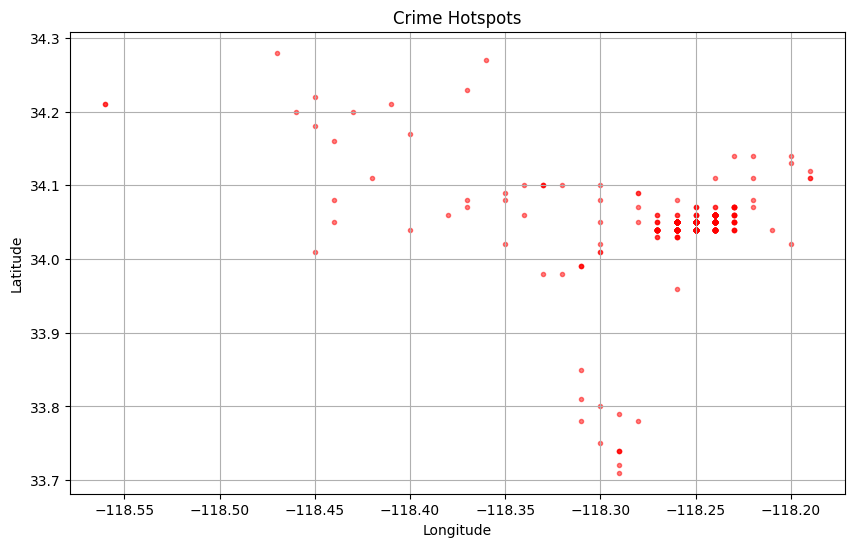

In [48]:
import plotly.express as px
query= '''select LAT , LON from crime_data'''
df=pd.read_sql(query,connection)

plt.figure(figsize=(10, 6))
plt.scatter(df['LON'], df['LAT'], alpha=0.5, marker='.', color='red')
plt.title('Crime Hotspots')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()


fig=px.scatter(df, x='LON', y='LAT', title="Crime Occurence(Spatial)")
fig.show()

In [56]:
import folium
from folium.plugins import HeatMap
import pandas as pd

query= '''select LAT , LON from crime_data'''
df=pd.read_sql(query,connection)


crime_map = folium.Map(location=[df['LAT'].mean(), df['LON'].mean()], zoom_start=10)


for _, row in df.iterrows():
    folium.Marker(location=[row['LAT'], row['LON']]).add_to(crime_map)

heatmap_data = [[row['LAT'], row['LON']] for _, row in df.iterrows()]
HeatMap(heatmap_data).add_to(crime_map)


crime_map.save('crime_map.html')  
crime_map


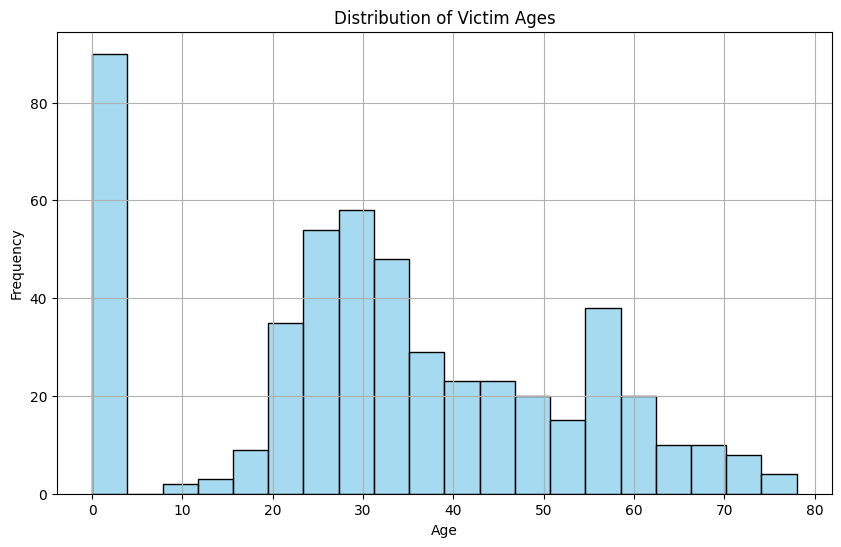

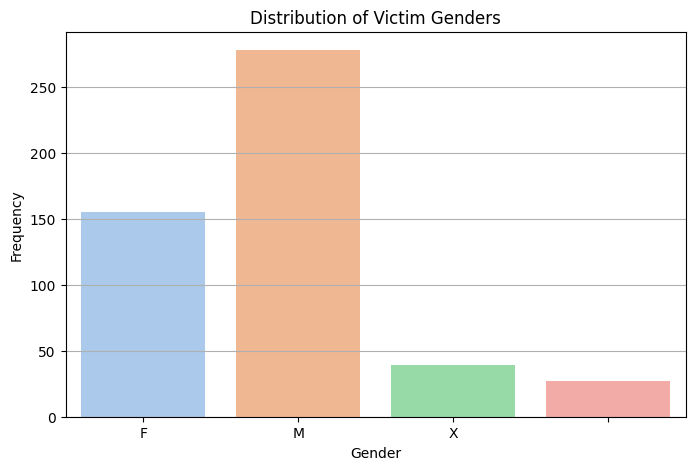

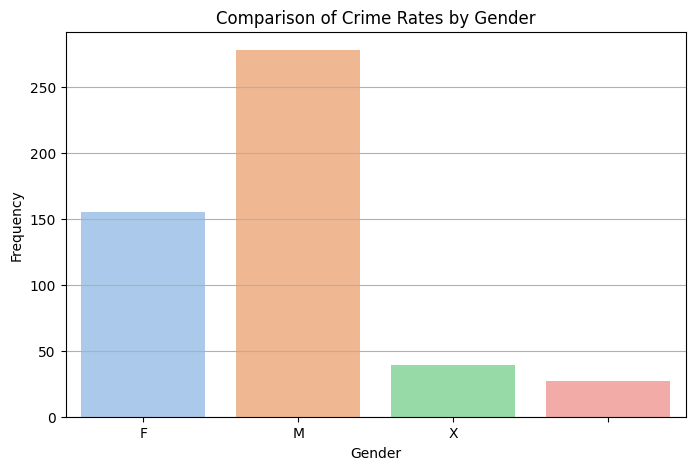

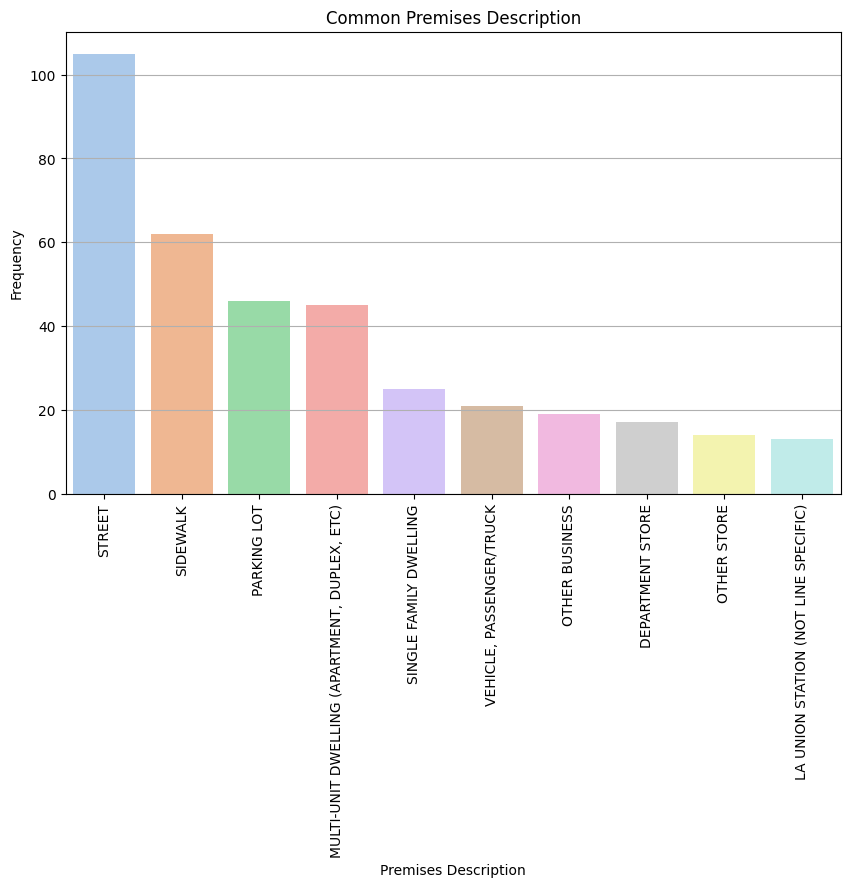

In [50]:
import seaborn as sns
query = """select Vict_Age, Vict_Sex, Premis_Desc from crime_data"""
df= pd.read_sql(query, connection)

# Data cleaning: handle missing values
df.dropna(subset=['Vict_Age', 'Vict_Sex'], inplace=True) 

# Distribution of Victim Ages
plt.figure(figsize=(10, 6))
sns.histplot(df['Vict_Age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Victim Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Distribution of Victim Genders
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Vict_Sex', palette='pastel')
plt.title('Distribution of Victim Genders')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.xticks(rotation=0) 
plt.grid(axis='y')
plt.show()

# Comparison of Crime Rates by Gender
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Vict_Sex', palette='pastel')
plt.title('Comparison of Crime Rates by Gender')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.xticks(rotation=0) 
plt.grid(axis='y')
plt.show()

# Identify Common Premises
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Premis_Desc', order=df['Premis_Desc'].value_counts().index[:10], palette='pastel')
plt.title('Common Premises Description')
plt.xlabel('Premises Description')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()



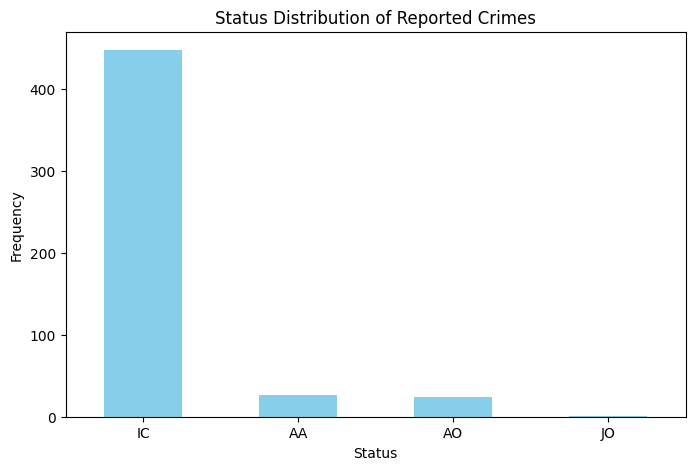

Status Counts:
Status
IC    447
AA     27
AO     24
JO      1
Name: count, dtype: int64


In [51]:

# Query to retrieve status data
query = "SELECT Status FROM crime_data"


status_data = pd.read_sql(query, connection)

# Classify crimes by status
status_counts = status_data['Status'].value_counts()

# Visualize status distribution
plt.figure(figsize=(8, 5))
status_counts.plot(kind='bar', color='skyblue')
plt.title('Status Distribution of Reported Crimes')
plt.xlabel('Status')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

# Print status counts
print("Status Counts:")
print(status_counts)


Questions:

Spatial Analysis:

1]   Where are the geographical hotspots for reported crimes?
ANSWER: The los angeles of california states between latitude 34 degree to 34.1 degree and longitude -118.30 degree to -118.20 degree
      is significant hostspot for reported crimes.


2] What is the distribution of victim ages in reported crimes?
ANSWER: In above analysis we can say that from age group 0 to 5 the number of crime record is higher.


3] Is there a significant difference in crime rates between male and female victims?
ANSWER:There is significant difference in crime rate between male and female.
    - male victimes has committed more crimes than female victimes
    - male has crime rate 250 while female has slightly more than 150

In [54]:
'''4] Where do most crimes occur based on the Location column?'''
#ans: 
import pandas as pd

location_counts = data['Location'].value_counts()

# Get the top 10 most common locations
top_locations = location_counts.head(5)

print("Top 10 Most Common Locations for Reported Crimes:")
print(top_locations)


Top 10 Most Common Locations for Reported Crimes:
Location
1100 W 39TH PL       1
700 S HILL ST        1
5400 CORTEEN PL      1
14400 TITUS ST       1
700 S FIGUEROA ST    1
Name: count, dtype: int64


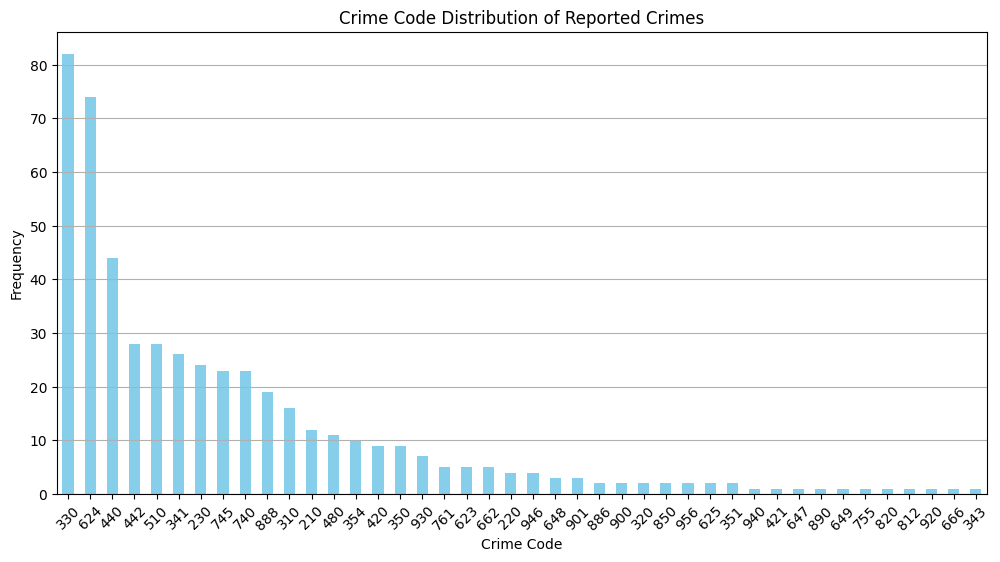

Crime Code Counts:
Crm_Cd
330    82
624    74
440    44
442    28
510    28
341    26
230    24
745    23
740    23
888    19
310    16
210    12
480    11
354    10
420     9
350     9
930     7
761     5
623     5
662     5
220     4
946     4
648     3
901     3
886     2
900     2
320     2
850     2
956     2
625     2
351     2
940     1
421     1
647     1
890     1
649     1
755     1
820     1
812     1
920     1
666     1
343     1
Name: count, dtype: int64


In [55]:
'''5] What is the distribution of reported crimes based on Crime Code?'''

 
query = "select Crm_Cd from crime_data"

# Execute query and fetch data into a pandas DataFrame
crime_code_data = pd.read_sql(query, connection)


# Classify crimes by crime code
crime_code_counts = crime_code_data['Crm_Cd'].value_counts()

# Visualize crime code distribution
plt.figure(figsize=(12, 6))
crime_code_counts.plot(kind='bar', color='skyblue')
plt.title('Crime Code Distribution of Reported Crimes')
plt.xlabel('Crime Code')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

# Print crime code counts
print("Crime Code Counts:")
print(crime_code_counts)
